In [1]:
%tensorflow_version 1.14
import tensorflow
tensorflow.__version__

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


'1.15.2'

In [2]:
from keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

Using TensorFlow backend.


In [0]:
import numpy as np

In [0]:
def print_structures():
    print(
        'training data \
            \n\tcount: {} \
            \n\tdimensions: {} \
            \n\tshape: {} \
            \n\tdata type: {}\n\n'.format(
                len(train_data),
                train_data.ndim,
                train_data.shape,
                train_data.dtype
        ),
        'testing data \
            \n\tcount: {} \
            \n\tdimensions: {} \
            \n\tshape: {} \
            \n\tdata type: {} \
            \n\tvalues: {}\n'.format(
                len(test_labels),
                test_labels.ndim,
                test_labels.shape,
                test_labels.dtype,
                test_labels
        )
    )

In [5]:
print_structures()

training data             
	count: 404             
	dimensions: 2             
	shape: (404, 13)             
	data type: float64

 testing data             
	count: 102             
	dimensions: 1             
	shape: (102,)             
	data type: float64             
	values: [ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]



The dataset contains 13 different features:

0. Per capita crime rate.
1. The proportion of residential land zoned for lots over 25,000 square feet.
2. The proportion of non-retail business acres per town.
3. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
4. Nitric oxides concentration (parts per 10 million).
5. The average number of rooms per dwelling.
6. The proportion of owner-occupied units built before 1940.
7. Weighted distances to five Boston employment centers.
8. Index of accessibility to radial highways.
9. Full-value property-tax rate per $10,000.
10. Pupil-teacher ratio by town.
11. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
12. Percentage lower status of the population.

## Normalize features

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## Synthetic feature
Distances to employment centers - index of accessibility to radial highways. A high distance to employment centers is bad, but the problem can be mitigated by accessibility to radial highways (easier to get to work if you can go on radial highways). I don't want this number to ever be negative (that would penalize areas that both are close to employment centers and have high accessibility to radial highways), so I make sure it can't go below 0 (see the `np.clip` below). Since we just normalized, the two features we are combining to make this new feature should be on the same scale. And since the combination is just subtraction, the new feature should be on the same scale as the rest of the data.

In [7]:
new_feature = train_data[:,7] - train_data[:,8]
np.clip(new_feature, a_min=0, a_max=None, out=new_feature)

array([7.42947356e-01, 2.10404777e+00, 0.00000000e+00, 1.61832220e+00,
       0.00000000e+00, 9.94857342e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.52698696e+00, 2.10404777e+00, 3.64810917e-02,
       0.00000000e+00, 1.56042607e+00, 2.67119169e+00, 1.14404505e+00,
       1.43570154e+00, 0.00000000e+00, 1.40882380e+00, 1.46149726e+00,
       1.09068116e+00, 0.00000000e+00, 2.16006789e+00, 0.00000000e+00,
       0.00000000e+00, 1.00023387e+00, 1.56042607e+00, 9.94857342e-01,
       9.78534416e-01, 6.49393106e-01, 9.94857342e-01, 6.64976277e-01,
       0.00000000e+00, 1.71814167e+00, 1.85164068e+00, 0.00000000e+00,
       0.00000000e+00, 9.51410095e-01, 0.00000000e+00, 8.72207077e-01,
       0.00000000e+00, 0.00000000e+00, 1.03978508e+00, 0.00000000e+00,
       3.66901689e-01, 2.16006789e+00, 0.00000000e+00, 1.25303869e-01,
      

In [0]:
train_data = np.column_stack((train_data, new_feature))

## Validation: K-fold validation

In [0]:
from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [10]:
import keras
keras.__version__

'2.2.5'

In [11]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0












processing fold # 1
processing fold # 2
processing fold # 3


In [12]:
all_scores

[2.143000701866528, 2.6548423531031844, 2.8089423580925064, 2.528642014701768]

In [13]:
np.mean(all_scores)

2.533856856940997

In [14]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [17]:
k = 4
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

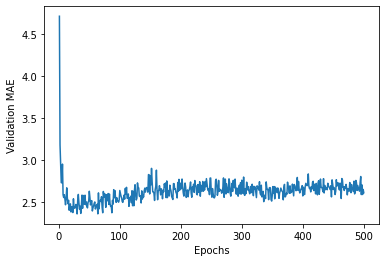

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

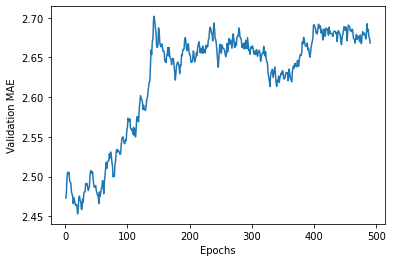

In [21]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [0]:
new_feature_test = test_data[:,7] - test_data[:,8]
np.clip(new_feature_test, a_min=0, a_max=None, out=new_feature_test)
test_data2 = np.column_stack((test_data, new_feature_test))

In [25]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_labels,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data2, test_labels)

102/102 [==============================] - 0s 1ms/step


In [26]:
test_mae_score

2.9123452784968356